# <span style='font-size:50px;background-color:yellow;'>&#128201;</span> <font color="#004080"> *Text Classification, Word2Vec (Using Scikit-learn) ::* </font>


### (a) : i. 20-newgroup dataset is a collection of newsgroups in 20 topics. Fetch 20-newsgroup dataset --> 

In [1]:
#Required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/home/devansh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
#dataset
news_train = fetch_20newsgroups(subset='train')
print("Dataset Size: {}".format(len(news_train.data)))
print("No. of targets: {}".format(len(news_train.target_names)))
print(news_train.target_names)

Dataset Size: 11314
No. of targets: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
print(news_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### ii. Pre-process the dataset: Convert to lowercase, remove punctuations, symbols, and stopwords. You can use NLTK or any other library of your choice -->

In [5]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/devansh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### NOTE: Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. eg. "the", "is", "are", etc.

In [6]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

news_data = []
for news in news_train.data:
    tokens = tokenizer.tokenize(news)
    tokens = [word.lower() for word in tokens if word not in stop_words]
    news_data.append(tokens)

In [7]:
print(news_data[0])

['from', 'lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'what', 'car', 'nntp', 'posting', 'host', 'rac3', 'wam', 'umd', 'edu', 'organization', 'university', 'maryland', 'college', 'park', 'lines', '15', 'i', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'i', 'saw', 'day', 'it', '2', 'door', 'sports', 'car', 'looked', 'late', '60s', 'early', '70s', 'it', 'called', 'bricklin', 'the', 'doors', 'really', 'small', 'in', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'this', 'i', 'know', 'if', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'e', 'mail', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst']


### iii. Convert the words in the dataset to vectors of dimension 100 using Word2Vec. Ignore words whose frequency is less than 10 -->

In [8]:
from gensim.models import Word2Vec

In [9]:
#creating model for word2vec
model = Word2Vec(news_data, min_count=10, size = 100, workers=4)
print(model.wv['computer'])

[-0.63178045  0.14701477 -0.9677117  -1.4026958  -0.01257689  0.76724005
  0.7490408  -0.268622   -1.8036578  -0.52841717  0.48023084 -0.38444024
 -0.9947496  -0.10862866 -0.63559896  0.5022695   0.02964081 -2.4088655
  2.6012259   0.96129555 -1.8256431   0.741711    1.1375254  -0.64820623
 -1.0335785  -0.4219407  -1.8043085   2.2125664  -1.8287498   0.6745172
 -0.96782666  0.08666193  2.838143    1.1756344   1.15524     0.4048979
 -0.6720289   0.9046695   0.7922602  -0.81404173  0.46124217 -0.23520981
 -1.4663202  -0.20701079 -1.1383629  -1.199592    1.253996   -1.1150469
 -0.7092167   0.42734408 -1.9577467  -1.4764869   0.08731043 -0.67870444
  2.4538276  -0.7552877  -1.030001   -0.43309027  0.1177148  -1.4742565
 -0.521711   -0.16460894 -0.04608867  0.7298305   2.0644078   1.1838764
 -1.212602   -1.4201473   0.5811749  -0.7789924  -0.45439294 -0.7033724
  1.9128972  -0.58501685 -0.45056665  0.71454376 -1.9133699  -0.5285506
  1.9458358   0.38415882  3.1551805   0.6671028  -0.1597784

### iv. Find the vocabulary size -->

In [10]:
print("Vocabulary Size: {}".format(len(model.wv.vocab)))

Vocabulary Size: 20243


### v. Find the most similar words in the corpus to the word “car” along with their similarities -->

In [11]:
print("Most Similar Words to 'car': \n {}".format(model.wv.most_similar('car')))

Most Similar Words to 'car': 
 [('cars', 0.8458929061889648), ('bikes', 0.8330812454223633), ('tires', 0.8238001465797424), ('dealer', 0.8036827445030212), ('bike', 0.7970231771469116), ('shop', 0.7864423990249634), ('buying', 0.7854281067848206), ('motorcycle', 0.7675083875656128), ('toyota', 0.766653835773468), ('owner', 0.7645455598831177)]


### vi. Find the top 5 words similar to the following operations -->
    • girl + father - boy
    • sports - bat + ball

In [12]:
print("Most Similar Words to 'girl + father - boy': \n {}".format(model.wv.most_similar(positive=['girl', 'father'], negative=['boy'])))

Most Similar Words to 'girl + father - boy': 
 [('bodies', 0.8708351254463196), ('empty', 0.8503397703170776), ('son', 0.8472506403923035), ('escaped', 0.8365263342857361), ('fell', 0.8343572616577148), ('murdered', 0.8299189805984497), ('azerbaijani', 0.8266626596450806), ('woman', 0.8246853351593018), ('wounded', 0.8232619166374207), ('corpses', 0.821410596370697)]


In [13]:
print("Most Similar Words to 'sports - bat + ball': \n {}".format(model.wv.most_similar(positive=['sports', 'ball'], negative=['bat'])))

Most Similar Words to 'sports - bat + ball': 
 [('ticket', 0.8166694045066833), ('hospital', 0.7839789986610413), ('morning', 0.7806311845779419), ('town', 0.7793512344360352), ('league', 0.7633323073387146), ('near', 0.7544087171554565), ('late', 0.7494204044342041), ('took', 0.7465695142745972), ('yesterday', 0.741028368473053), ('sunday', 0.7406426668167114)]


### vii. Create a TSNE plot for the top 20 words similar to each of the words [‘baseball’, ‘software’,‘police’, ‘government’, ‘circuit’, ‘car’] -->

#### NOTE: t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

In [14]:
lst = ['baseball', 'software', 'police', 'government', 'circuit', 'car']
plt_lst = []

for word in lst:
    simwrd = [tpl[0] for tpl in model.wv.most_similar(word, topn=20)]
    plt_lst+=simwrd

print(plt_lst)

['hockey', 'nhl', 'espn', 'playoff', 'players', 'stats', 'braves', 'playoffs', 'team', 'majors', 'fans', 'teams', 'sport', 'coach', 'league', 'game', 'pitching', 'football', 'star', 'cubs', 'machines', 'multimedia', 'macintosh', 'packages', 'graphics', 'platforms', 'support', 'platform', 'unix', 'computers', 'hardware', 'solutions', 'amiga', 'workstations', 'pc', 'vendor', 'network', 'silicon', 'electronics', 'pci', 'tax', 'funds', 'concealed', 'officers', 'aid', 'federal', 'cops', 'guard', 'taxes', 'governments', 'officials', 'officer', 'foreign', 'african', 'labor', 'carrying', 'workers', 'reform', 'statistics', 'justice', 'citizen', 'citizens', 'regulation', 'federal', 'agencies', 'legitimate', 'governments', 'agents', 'tactical', 'legal', 'interests', 'houses', 'nsa', 'measures', 'criminal', 'funds', 'effectively', 'protect', 'cooperation', 'efforts', 'amp', 'frequency', 'signal', 'circuits', 'components', 'fixed', 'input', 'transmission', 'storage', 'signals', 'capability', 'conve

In [15]:
from sklearn.manifold import TSNE

In [19]:
vectors = []

for word in plt_lst:
    vectors.append(model.wv[word])
    
#applying pca, changing to bi-dimensional vectors
tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=5000)
new_vectors = tsne_model.fit_transform(vectors)

/home/devansh/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [20]:
print(new_vectors)

[[ 1.1927872   3.9180443 ]
 [ 1.0486528   3.689728  ]
 [-0.5968889   3.1062098 ]
 [-0.09658127  2.9497542 ]
 [ 1.1516117   3.6688757 ]
 [-0.80805534  2.6850717 ]
 [-0.09260148  3.4217472 ]
 [ 0.10085776  3.4157004 ]
 [ 1.3344615   3.3623805 ]
 [-1.9155148   2.1945567 ]
 [-0.10675262  3.6658218 ]
 [ 0.996109    3.6427076 ]
 [-0.7104519   2.6760254 ]
 [-0.26375252  3.2599955 ]
 [ 1.1478963   3.7845619 ]
 [ 1.1890681   3.0165186 ]
 [-0.11530519  3.4075422 ]
 [-1.8893914   2.0229137 ]
 [-0.21414952  2.683513  ]
 [-0.02450982  3.5036647 ]
 [-6.533945    3.0877137 ]
 [-4.7768297   2.992062  ]
 [-5.9437733   3.1560888 ]
 [-5.6818023   2.842169  ]
 [-6.9696603   3.400981  ]
 [-5.3339033   3.0834775 ]
 [-5.9116063   4.182977  ]
 [-4.3590155   2.8424904 ]
 [-6.7430863   3.9867783 ]
 [-5.335483    3.5770633 ]
 [-6.7507987   2.716868  ]
 [-4.219559    3.1373081 ]
 [-6.029574    3.085816  ]
 [-5.138515    3.0757203 ]
 [-6.9525056   3.1171534 ]
 [-4.794266    2.8273852 ]
 [-5.841747    4.1952877 ]
 

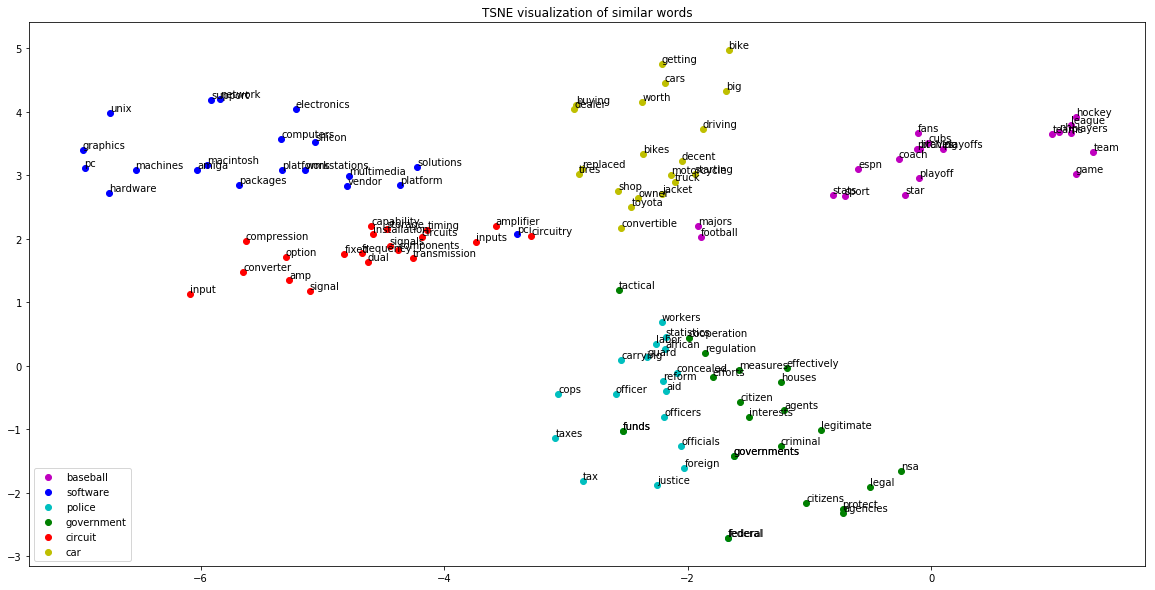

In [21]:
clr = ['m', 'b', 'c', 'g', 'r', 'y']

col=-1
j=0
#plotting the similar words
plt.figure(figsize=(20, 10)) 
plt.title("TSNE visualization of similar words")
for i in new_vectors:
    if((j%20)==0):
        col=col+1
        plt.scatter(i[0],i[1],c=clr[col],label=lst[col])
    else:
        plt.scatter(i[0],i[1],c=clr[col])
    plt.annotate(plt_lst[j],
                 xy=(i[0], i[1]),
                 va='bottom')
    j=j+1
plt.legend()
plt.show()

### viii. The dataset consists of documents. Each document is a datapoint. Formulate a methodology to represent each document as a vector using the word vectors. Mention the method employed to create the vector representation of the documents -->

<br><br><br><br><br>
### (b) i. Split the dataset into training (70%), validation(10%) and testing(20%) data -->

In [25]:
print("Total Data : {}".format(len(news_data)))
train_data = news_data[ : int(0.7*11314)]
test_data = news_data[int(0.7*11314):int(0.9*11314)]
val_data = news_data[int(0.9*11314) : ]
print("Training Data : {}".format(len(train_data)))
print("Test Data : {}".format(len(test_data)))
print("Validation Data : {}".format(len(val_data)))

Total Data : 11314
Training Data : 7919
Test Data : 2263
Validation Data : 1132
